# Hierarchical clustering Analysis of Qualitatives variables (VARQUALHCA)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
#changement de dossier
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

#importation des données
import pandas as pd
vote = pd.read_excel("vote_clustering.xlsx")
vote.head()


,affiliation,budget,physician,salvador,nicaraguan,missile,education
0,republican,n,y,y,n,n,y
1,republican,n,y,y,n,n,y
2,democrat,y,neither,y,n,n,n
3,democrat,y,n,neither,n,n,n
4,democrat,y,n,y,n,n,neither


In [3]:
#variables actives
X = vote.iloc[:,1:]
print(X.columns)

Index(['budget', 'physician', 'salvador', 'nicaraguan', 'missile',
       'education'],
      dtype='object')


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   budget      435 non-null    object
 1   physician   435 non-null    object
 2   salvador    435 non-null    object
 3   nicaraguan  435 non-null    object
 4   missile     435 non-null    object
 5   education   435 non-null    object
dtypes: object(6)
memory usage: 20.5+ KB


In [5]:
# Importation de la fonction
from scientisttools import CATVARHCA, plot_dendrogram

### CAH sur les variables : V de Cramer

#### Matrice originale

In [6]:
# Construction du model
catvarhca = CATVARHCA(n_clusters=2,diss_metric="cramer",metric="euclidean",method="ward",parallelize=True)
# Instanciation
catvarhca.fit(X)

CATVARHCA(n_clusters=2, parallelize=True)

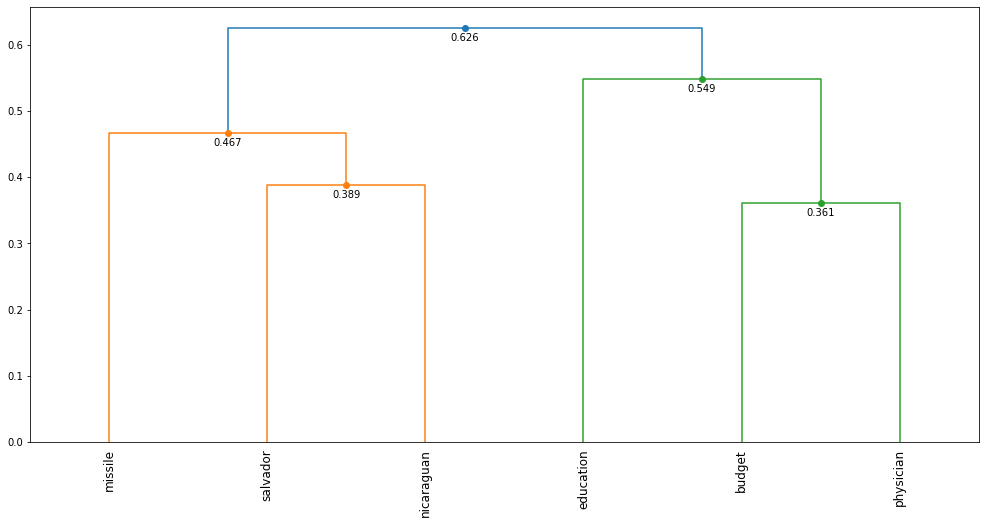

In [7]:
import matplotlib.pyplot as plt
fig, axe = plt.subplots(figsize=(17,8))
plot_dendrogram(catvarhca,ax=axe,leaf_rotation=90,color_threshold=0.6)
plt.show()

In [8]:
# Positionner les variables supplémentaires
Xsup =  vote.iloc[:,0]
catvarhca.transform(Xsup)

,1,2
affiliation,0.780505,0.666967


### CAH sur les modalités : Indice de Dice

#### Matrice originale

In [9]:
catvarhca2 = CATVARHCA(n_clusters=3,diss_metric="dice",metric="euclidean",method="average",parallelize=True)
# Instanciation
catvarhca2.fit(X)

CATVARHCA(diss_metric='dice', method='average', n_clusters=3, parallelize=True)

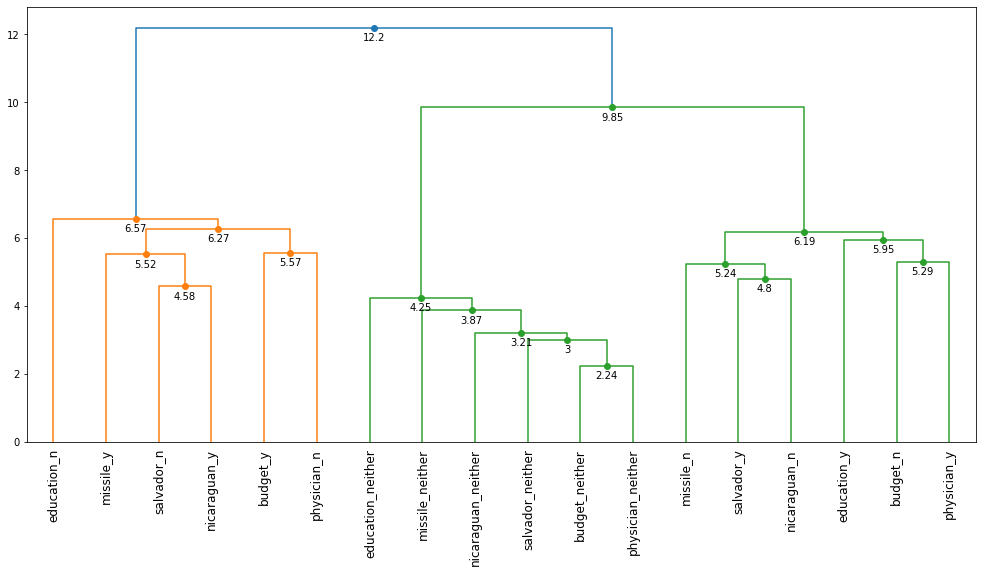

In [10]:
fig, axe = plt.subplots(figsize=(17,8))
plot_dendrogram(catvarhca2,ax=axe,orientation='top',leaf_rotation=90,color_threshold=10)

In [11]:
# Position de la variable supplémentaire
import numpy as np
np.sqrt(catvarhca2.transform(Xsup))

,1,2,3
affiliation = democrat,13.659551,11.441882,5.787918
affiliation = republican,5.560276,9.305017,13.564660


### CAH sur les modalités : bothpos

#### Matrice originale

In [12]:
catvarhca3 = CATVARHCA(n_clusters=3,diss_metric="bothpos",metric="euclidean",method="average",parallelize=True)
# Instanciation
catvarhca3.fit(X)

CATVARHCA(diss_metric='bothpos', method='average', n_clusters=3,
          parallelize=True)

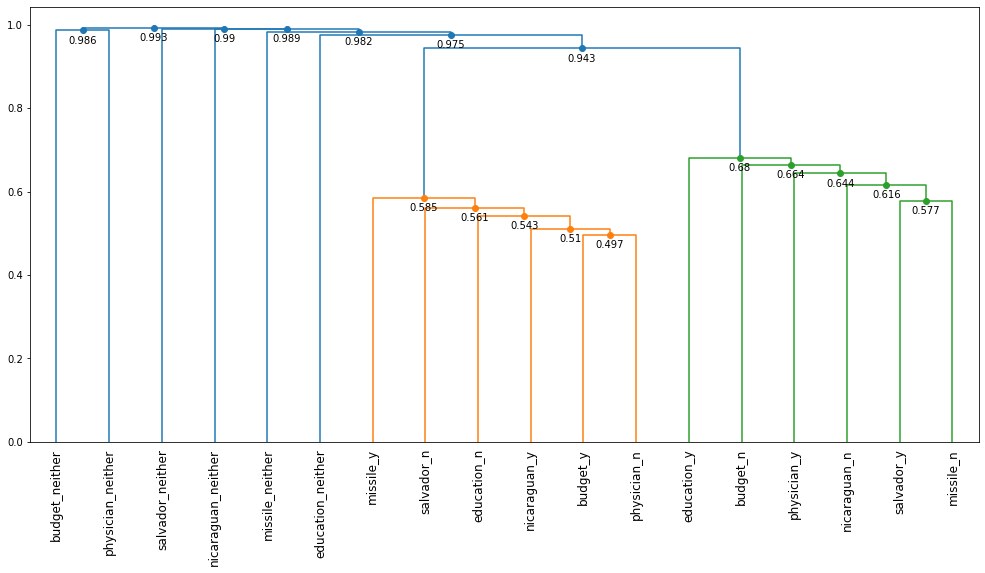

In [13]:
fig, axe = plt.subplots(figsize=(17,8))
plot_dendrogram(catvarhca3,ax=axe,orientation='top',leaf_rotation=90)

In [14]:
# Position de la variable supplémentaire
catvarhca3.transform(Xsup)

,1,2,3
affiliation = democrat,0.758621,0.982759,0.972414
affiliation = republican,0.847050,0.991954,0.993103
